# Emotion Recognition System with Adaptive User Interface

## About Project

This project develops an emotion recognition system that accurately classifies facial expressions into seven categories and integrates a dynamic, adaptive user interface to enhance human-computer interaction.



## Dataset

The FER-2013 [dataset](https://www.kaggle.com/datasets/msambare/fer2013)  is used that contains facial images classified into seven emotion categories: Angry, Disgust, Fear, Happy, Neutral, Sad, and Surprise. 

- The dataset is organized into two sets:
  - Train: Contains 28,709 images across seven emotion classes.
  - Test: Contains 7,178 images across the same classes.
- Each image is a grayscale JPEG file with a size of 48x48 pixels.



## Code

### Import Necessary Packages

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

### Choose Test and Train Data

In [2]:
train_dir = 'dataset/emotion/train'
test_dir = 'dataset/emotion/test'

### Exploratory Data Analysis - Visualize Dataset

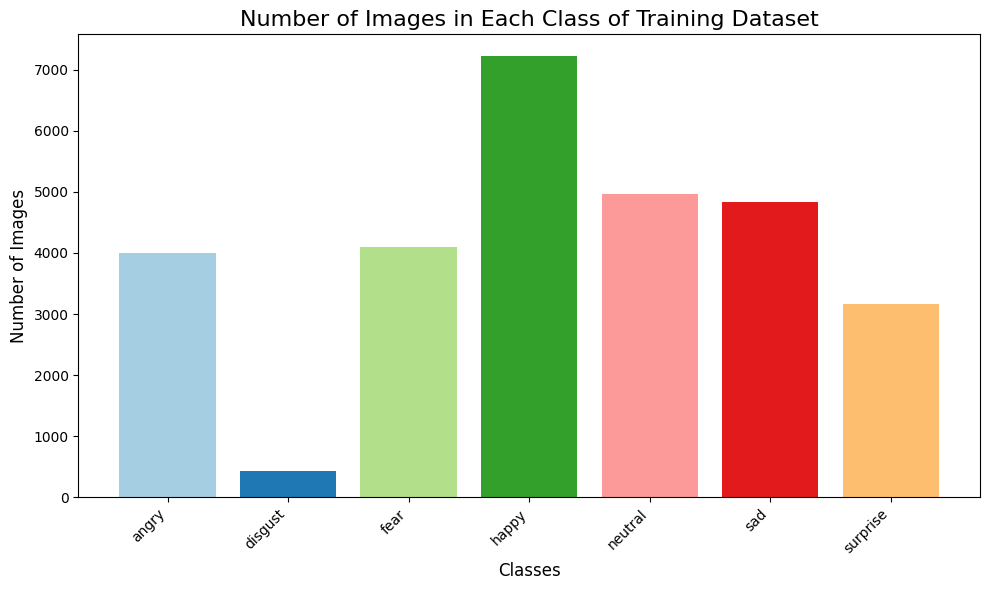

In [3]:
class_names = os.listdir(train_dir)

# Initialize a list 
class_counts = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts.append(num_images)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color=plt.cm.Paired.colors)
plt.title('Number of Images in Each Class of Training Dataset', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


### Data Preprocessing

Here data generators and augmentation are used for training a deep learning model on the FER-2013 dataset. Since loading all images at once is impractical, data generators will create batches. Also data augmentation techniques like rotation, shifting, and flipping are applied to expand the training set and improve model performance by increasing diversity and reducing overfitting.

In [4]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1, # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,# Randomly shift the height of images by up to 10%
    horizontal_flip = True, # Flip images horizontally at random
    rescale = 1./255,  # Rescale pixel values to be between 0 and 1(normalization)
    validation_split = 0.2 # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,  # Rescale pixel values to be between 0 and 1
    validation_split = 0.2 # Set aside 20% of the data for validation
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir, # Directory with training data
    target_size = (48, 48), # Resizes all images to 48x48 pixels
    batch_size = 64,  # Number of images per batch
    color_mode = "grayscale", # Converts the images to grayscale
    class_mode = "categorical", # Classifies the images into 7 categories
    subset = "training"  # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir, # Directory with validation data
    target_size = (48, 48), # Resizes all images to 48x48 pixels
    batch_size = 64, # Number of images per batch
    color_mode = "grayscale", # Converts the images to grayscale
    class_mode = "categorical", # Classifies the images into 7 categories
    subset = "validation"  # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


###  Build CNN Model

To develop the CNN architecture with required layers for better results and optimization

In [6]:
# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), kernel_initializer='he_normal'))
# Add a batch normalization layer
model.add(BatchNormalization())

# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
# Add a third batch normalization layer
model.add(BatchNormalization())

# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())

# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

c:\Users\Shimil\anaconda3\envs\ece5831-2024\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [7]:
# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,394,183 (5.32 MB)

 Trainable params: 1,391,943 (5.31 MB)

 Non-trainable params: 2,240 (8.75 KB)

### Set Callbacks - Hyperparameter Tuning

In [8]:
# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the callback
model_checkpoint = ModelCheckpoint('best_model.keras',
                                    monitor='val_accuracy',
                                    save_best_only=True,
                                    mode='max',
                                    verbose=1)

### Train Model

In [9]:
# Train the model
history = model.fit(train_generator, 
                    epochs=50, 
                    validation_data=validation_generator, 
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50


c:\Users\Shimil\anaconda3\envs\ece5831-2024\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.1704 - loss: 2.9580
Epoch 1: val_accuracy improved from -inf to 0.23673, saving model to best_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 116s 315ms/step - accuracy: 0.1705 - loss: 2.9576 - val_accuracy: 0.2367 - val_loss: 1.9095
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.2144 - loss: 2.4761
Epoch 2: val_accuracy improved from 0.23673 to 0.32891, saving model to best_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 111s 310ms/step - accuracy: 0.2144 - loss: 2.4760 - val_accuracy: 0.3289 - val_loss: 1.7736
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.2439 - loss: 2.2635
Epoch 3: val_accuracy improved from 0.32891 to 0.33939, saving model to best_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 112s 312ms/step - accuracy: 0.2439 - loss: 2.2634 - val_accuracy: 0.3394 - val_loss: 1.7326
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.2690 - loss: 2.1313
Epoch 4: val_accuracy improved f

### Evaluation

#### 1. Training and validation accuracy-loss curves

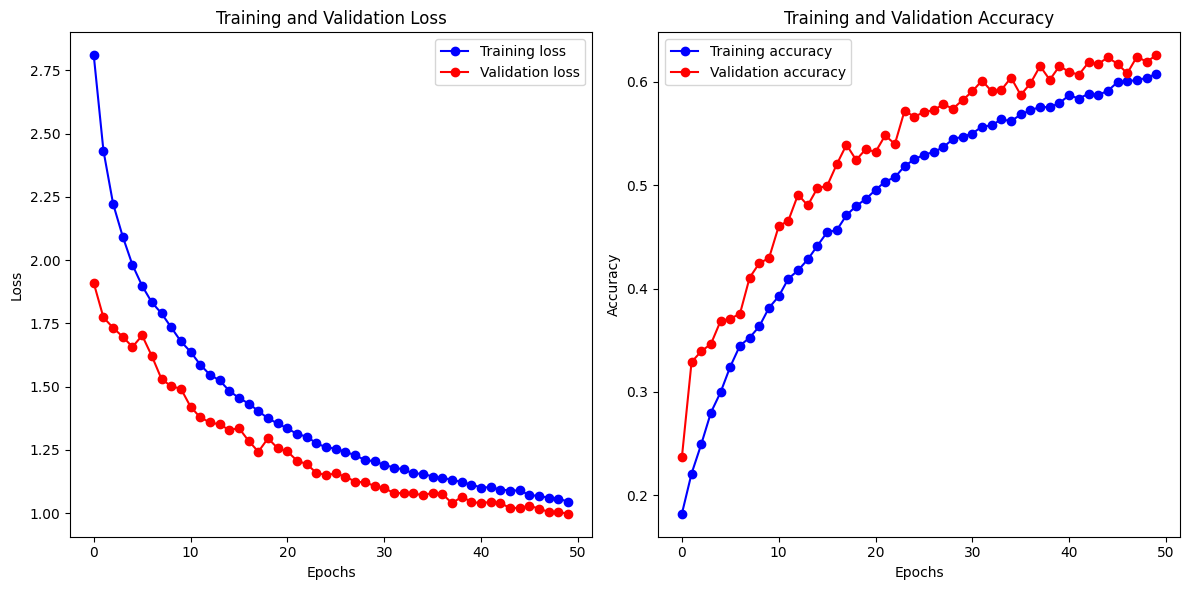

In [10]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'bo-', label='Training loss')
plt.plot(history.history['val_loss'], 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'bo-', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#### 2. Confusion Matrix

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step


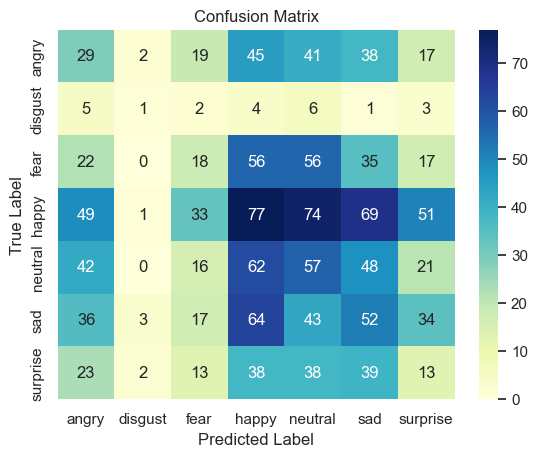

array([[29,  2, 19, 45, 41, 38, 17],
       [ 5,  1,  2,  4,  6,  1,  3],
       [22,  0, 18, 56, 56, 35, 17],
       [49,  1, 33, 77, 74, 69, 51],
       [42,  0, 16, 62, 57, 48, 21],
       [36,  3, 17, 64, 43, 52, 34],
       [23,  2, 13, 38, 38, 39, 13]])

In [11]:
# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
confusion_mtx

#### 3. Accuracy and Classification Report

In [12]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator, verbose=1)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Predict on the validation data
validation_predictions = model.predict(validation_generator, verbose=1)
validation_predictions = np.argmax(validation_predictions, axis=1)

# Get true labels from validation generator
true_labels = validation_generator.classes

# classification report
report = classification_report(true_labels, validation_predictions, target_names=validation_generator.class_indices.keys())
print("Classification Report:\n", report)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.6287 - loss: 0.9865
Test Accuracy: 62.57%
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.16      0.17      0.16       191
     disgust       0.11      0.05      0.06        22
        fear       0.17      0.10      0.12       204
       happy       0.24      0.24      0.24       354
     neutral       0.15      0.19      0.17       246
         sad       0.17      0.19      0.18       249
    surprise       0.11      0.10      0.11       166

    accuracy                           0.17      1432
   macro avg       0.16      0.15      0.15      1432
weighted avg       0.17      0.17      0.17      1432



### Predict on Test Dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


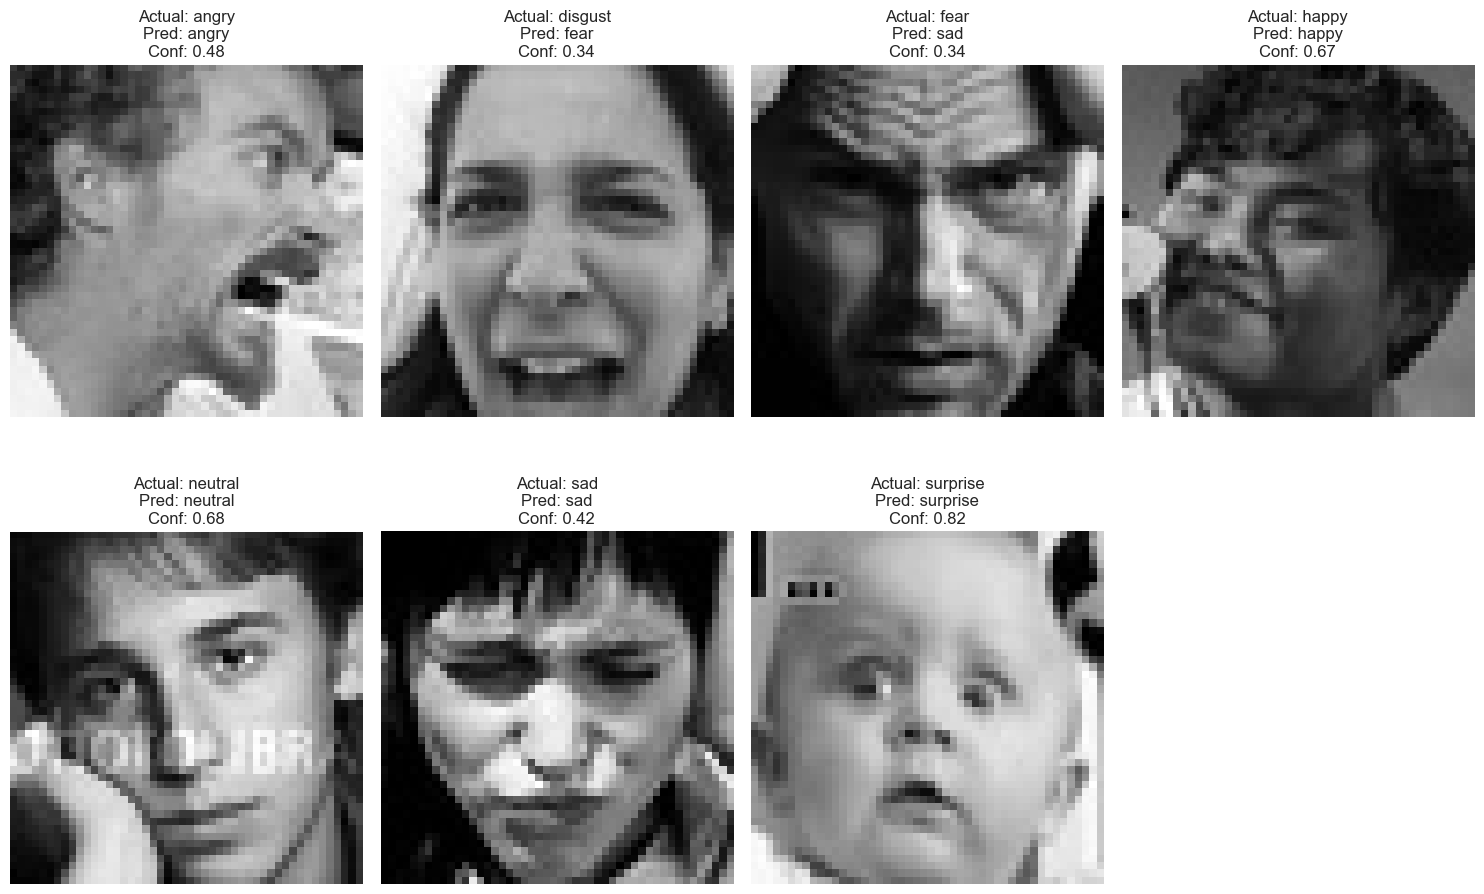

In [13]:
test_dir = 'dataset/emotion/test'

class_names = os.listdir(test_dir)

def predict_image(image_path):
    '''Function to load, preprocess and predict the image'''
    img = image.load_img(image_path, target_size=(48, 48), color_mode="grayscale")
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    prediction = model.predict(img_array)  # Predict the class
    predicted_class = np.argmax(prediction)  # Get the index of the class with highest probability
    return predicted_class, prediction[0][predicted_class]

plt.figure(figsize=(15, 10))

# Loop through the 7 classes and select one image from each class
for i, class_name in enumerate(class_names):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        # Select the one image from each class
        image_path = os.path.join(class_path, os.listdir(class_path)[1])
        
        # Predict the image class
        predicted_class, confidence = predict_image(image_path)

        # Display the image and prediction
        img = image.load_img(image_path, target_size=(48, 48), color_mode="grayscale")
        plt.subplot(2, 4, i+1) 
        plt.imshow(img, cmap='gray')
        actual_class = class_name
        plt.title(f'Actual: {actual_class}\nPred: {class_names[predicted_class]}\nConf: {confidence:.2f}')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
model.save('best_model.keras')